In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

In [6]:
def RK2(f, a, b, α0, N):
    '''
    function that approximate the initial value problem (IVP) y'(t) = f(t,y(t))
    a < t < b, y(a) = α, using second order Runge-Kutta method.
    
    Parameters
    ==========
    f: function in IVP
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    α: float number, initial condition of the IVP at t = a
    N: integer, number of subintervals
    
    Returns
    =======
    The solution y, as an array of values
    The sampled time t, as an array of values
    '''
    
    Δt = (b-a)/ N
    t = [a + i * Δt for i in range(N+1)] #careful in range, the endpoint is excluded

    y = [α0]
    for i in range(1, N+1):
        y.append( y[i-1] + Δt * f(t[i-1] + 0.5*Δt, y[i-1] + 0.5*Δt*f(t[i-1], y[i-1]) ) )
    return y, t

In [41]:
α = 2
M = 35
f = lambda t, y: α*y *(1 - y/M)
a = 0
b = 5
N = 20
y0 = 2
y, t = RK2(f, a, b, y0, N)
exact = lambda x: (2*M)/(M-2) * np.exp(α *x)/(1 + 2/(M-2)*np.exp(α *x))

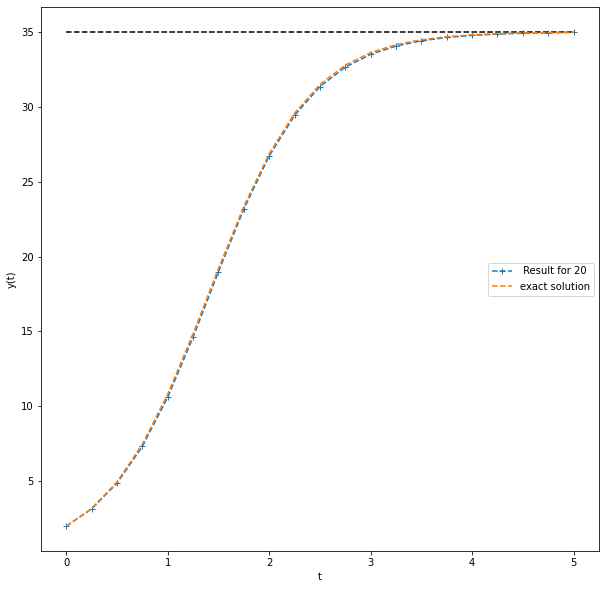

In [42]:
fig, ax1 = plt.subplots(1, 1,figsize=(10, 10))
ax1.plot(t, y, '--+', label = f' Result for {N}')
ax1.plot(t, exact(np.array(t)), '--', label = 'exact solution')
ax1.hlines(M, a, b, colors='k', linestyles='--') 
ax1.legend(loc = 'center right')
plt.xlabel('t')
plt.ylabel('y(t)')
error_y = np.abs(y - exact(np.array(t)) )